In [7]:
import matplotlib.pyplot as plt
import numpy as np
from modelnet40 import ModelNet40AtlasNet

dataset = ModelNet40AtlasNet(shuffle=True, pcd_normalization="UnitBall", num_point= 2000, inference=True)
val_dataset = ModelNet40AtlasNet('test', shuffle=True, pcd_normalization="UnitBall", inference=True)
airplane_dataset = ModelNet40AtlasNet(class_choice= ['airplane'], shuffle=True, pcd_normalization="UnitBall", inference=True)
seq_dataset = ModelNet40AtlasNet(shuffle=False, pcd_normalization="UnitBall", inference=True)


In [8]:

# Get Dataset Len should be 9843
LENGTH = 9843
print(len(airplane_dataset)) # 626
print(len(dataset), len(val_dataset)) # 9843, 2468

assert(len(dataset) == LENGTH)

626
9843 2468


In [10]:
# Get 10 sequential train samples 

for i in range(10):
    print("PCD: ", seq_dataset[i]['pcd_filename'], "  IMG: ", seq_dataset[i]['img_filename'])

PCD:  airplane_0001.pcd   IMG:  airplane_0001_v001.png
PCD:  airplane_0002.pcd   IMG:  airplane_0002_v004.png
PCD:  airplane_0003.pcd   IMG:  airplane_0003_v001.png
PCD:  airplane_0004.pcd   IMG:  airplane_0004_v005.png
PCD:  airplane_0005.pcd   IMG:  airplane_0005_v001.png
PCD:  airplane_0006.pcd   IMG:  airplane_0006_v002.png
PCD:  airplane_0007.pcd   IMG:  airplane_0007_v007.png
PCD:  airplane_0008.pcd   IMG:  airplane_0008_v001.png
PCD:  airplane_0009.pcd   IMG:  airplane_0009_v011.png
PCD:  airplane_0010.pcd   IMG:  airplane_0010_v008.png


PCD:  guitar_0137.pcd   IMG:  guitar_0137_v006.png
PCD:  monitor_0387.pcd   IMG:  monitor_0387_v007.png
PCD:  sofa_0329.pcd   IMG:  sofa_0329_v011.png
PCD:  door_0081.pcd   IMG:  door_0081_v004.png
PCD:  bathtub_0098.pcd   IMG:  bathtub_0098_v008.png
PCD:  range_hood_0113.pcd   IMG:  range_hood_0113_v008.png
PCD:  tent_0050.pcd   IMG:  tent_0050_v005.png
PCD:  car_0060.pcd   IMG:  car_0060_v005.png
PCD:  bookshelf_0046.pcd   IMG:  bookshelf_0046_v002.png
PCD:  monitor_0453.pcd   IMG:  monitor_0453_v004.png


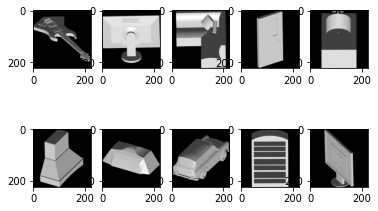

In [13]:
# Get 8 random train samples

for i in range(10):
    print("PCD: ", dataset[i]['pcd_filename'], "  IMG: ", dataset[i]['img_filename'])
    
# Draw first 8 samples (viewpoint can change)
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    img = dataset[i]['rendering']
    img = img.swapaxes(0, 1)
    img = img.swapaxes(1, 2)
    plt.imshow(img)
plt.show()

In [14]:
# Visualize first sample
import k3d 
SIZE = 2048
def visualize_pointcloud(point_cloud, point_size, colors=None, flip_axes=False, name='point_cloud'):
    plot = k3d.plot(name=name, grid_visible=False, grid=(-0.55, -0.55, -0.55, 0.55, 0.55, 0.55))
    if flip_axes:
        point_cloud[:, 2] = point_cloud[:, 2] * -1
        point_cloud[:, [0, 1, 2]] = point_cloud[:, [0, 2, 1]]
    plt_points = k3d.points(positions=point_cloud.astype(np.float32), point_size=point_size, colors=colors if colors is not None else [], color=0xd0d0d0)
    plot += plt_points
    plt_points.shader = '3d'
    plot.display()
    
points = dataset[3]['pointcloud'].numpy()[0]
print("Visualize ", dataset[3]['pcd_filename'])

visualize_pointcloud(points, point_size=0.025, flip_axes=True)

Visualize  door_0081.pcd


Output()